import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_excel("financial_loan.xlsx")

In [4]:
df.sample(3)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
22804,680934,GA,INDIVIDUAL,10+ years,us postal service,C,MORTGAGE,2021-03-11,2021-06-12,2021-07-12,...,C2,60 months,Verified,60000.0,0.2302,332.65,0.1306,14600,29,16775
15527,614662,OK,INDIVIDUAL,< 1 year,"Dell, Inc",C,RENT,2021-11-10,2021-11-13,2021-12-13,...,C3,36 months,Source Verified,45000.0,0.0576,134.74,0.1298,4000,19,4851
34034,647079,NV,INDIVIDUAL,10+ years,Clark County School District,C,RENT,2021-01-11,2021-05-16,2021-12-12,...,C1,36 months,Source Verified,65499.0,0.1814,133.30,0.1223,4000,30,4682


# Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [7]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [9]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [14]:
print("No. of Rows :",df.shape[0])
print("No. of Column :",df.shape[1])

No. of Rows : 38576
No. of Column : 24


In [16]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


# BRD 1 : Summary

## Total loan Application

In [17]:
total_loan_application = df['id'].count()
print("Total loan application:",total_loan_application)

Total loan application: 38576


## MTD(Month To Date) Total Loan Applications

In [22]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications(for December 2021):4314


## Total Funded Amount

In [26]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount (in millions) :",total_funded_amount_millions)

Total Funded Amount (in millions) : 435.757075


## MTD - Total Funded Amount

In [31]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000

print("MTD Total Funded Amount : ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount : $53.98M


## Total Amount Received

In [28]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received / 1000000
print("Total Amount Received :",total_amount_received_millions)

Total Amount Received : 473.070933


## MTD - Total Amount Received

In [33]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_funded_amount / 1000000

print("MTD Total Amount Received : ${:.2f}M".format(mtd_total_amount_received_millions))

MTD Total Amount Received : $58.07M


## Average Interest Rate

In [49]:
avg_interest_rate = df['int_rate'].mean() * 100
print("Average Interest Rate {:.2f}%".format(avg_interest_rate))

Average Interest Rate 12.05%


## Average DTI(Debt-to-Income) Ratio

In [51]:
avg_dti_rate = df['dti'].mean() * 100
print("Average Interest Rate {:.2f}%".format(avg_dti_rate))

Average Interest Rate 13.33%


### Good Loan Metrics

In [60]:
good_loan = df[df['loan_status'].isin(["Fully Paid","Current"])]

total_loan_applications = df['id'].count()
good_loan_applications = good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_received = good_loan['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications/total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan funded Amount (in millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan total received (in millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan funded Amount (in millions): $370.22M
Good Loan total received (in millions): $435.79M
Percentage of Good Applications: 86.18%


### Bad Loan Metrics

In [65]:
Bad_loan = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()
bad_loan_applications = Bad_loan['id'].count()
bad_loan_funded_amount = Bad_loan['loan_amount'].sum()
bad_loan_received = Bad_loan['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications) * 100

print("bad Loan Applications:", bad_loan_applications)
print("bad Loan funded Amount (in millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("bad Loan total received (in millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of bad Applications: {:.2f}%".format(bad_loan_percentage))

bad Loan Applications: 5333
bad Loan funded Amount (in millions): $65.53M
bad Loan total received (in millions): $37.28M
Percentage of bad Applications: 13.82%


# BRD 2 : Overview

## Monthly Trends by Issue Date for Total Funded Amount

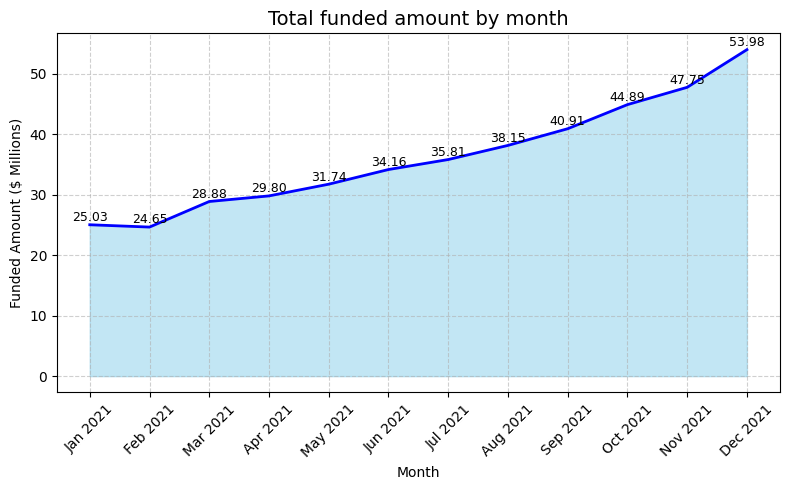

In [74]:
monthly_funded = (
    df.sort_values('issue_date')
        .assign(month_name = lambda x : x['issue_date'].dt.strftime('%b %Y'))
        .groupby('month_name',sort=False)['loan_amount'].sum().div(1000000)
        .reset_index(name = 'loan_amount_millions')
)

plt.figure(figsize=(8,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i,row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total funded amount by month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Amount Received

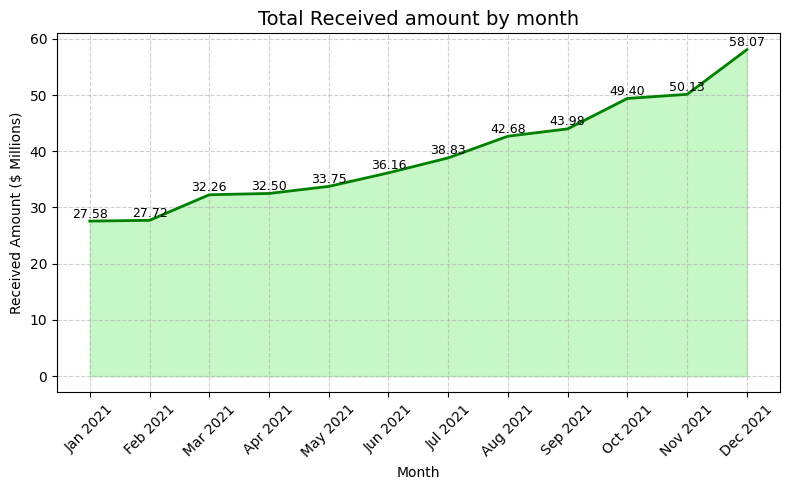

In [80]:
monthly_received = (
    df.sort_values('issue_date')
        .assign(month_name = lambda x : x['issue_date'].dt.strftime('%b %Y'))
        .groupby('month_name',sort=False)['total_payment'].sum().div(1000000)
        .reset_index(name = 'received_amount_millions')
)

plt.figure(figsize=(8,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'],color='lightgreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green',linewidth=2)

for i,row in monthly_received.iterrows():
    plt.text(i,row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Received amount by month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_received)),labels=monthly_received['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=.6)
plt.tight_layout()
plt.show()

## Monthly Trends by Issue Date for Total Loan Applications

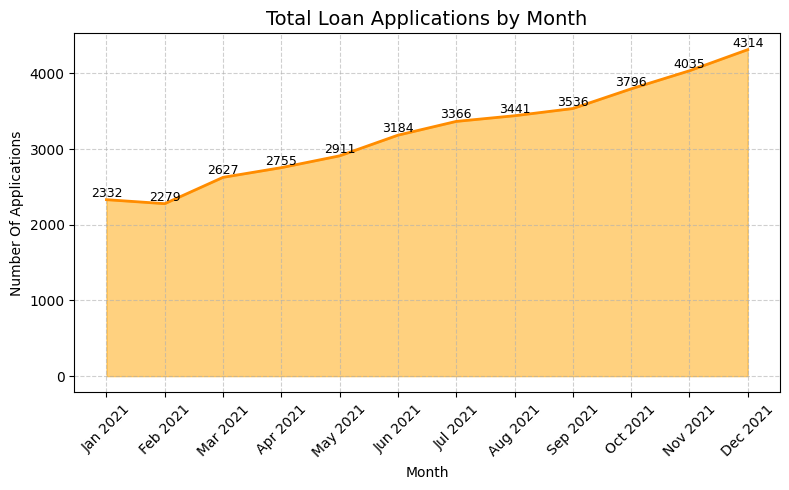

In [87]:
monthly_applications = (
    df.sort_values('issue_date')
        .assign(month_name = lambda x : x['issue_date'].dt.strftime('%b %Y'))
        .groupby('month_name',sort=False)['id'].count()
        .reset_index(name = 'loan_applications_count')
)

plt.figure(figsize=(8,5))
plt.fill_between(monthly_applications['month_name'],monthly_applications['loan_applications_count'],color='orange',alpha=0.5)
plt.plot(monthly_applications['month_name'],monthly_applications['loan_applications_count'],color='darkorange',linewidth=2)

for i,row in monthly_applications.iterrows():
    plt.text(i,row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Loan Applications by Month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number Of Applications')
plt.xticks(ticks=range(len(monthly_applications)),labels=monthly_applications['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=.6)
plt.tight_layout()
plt.show()

## Regional Analysis by State for Total Funded AMount

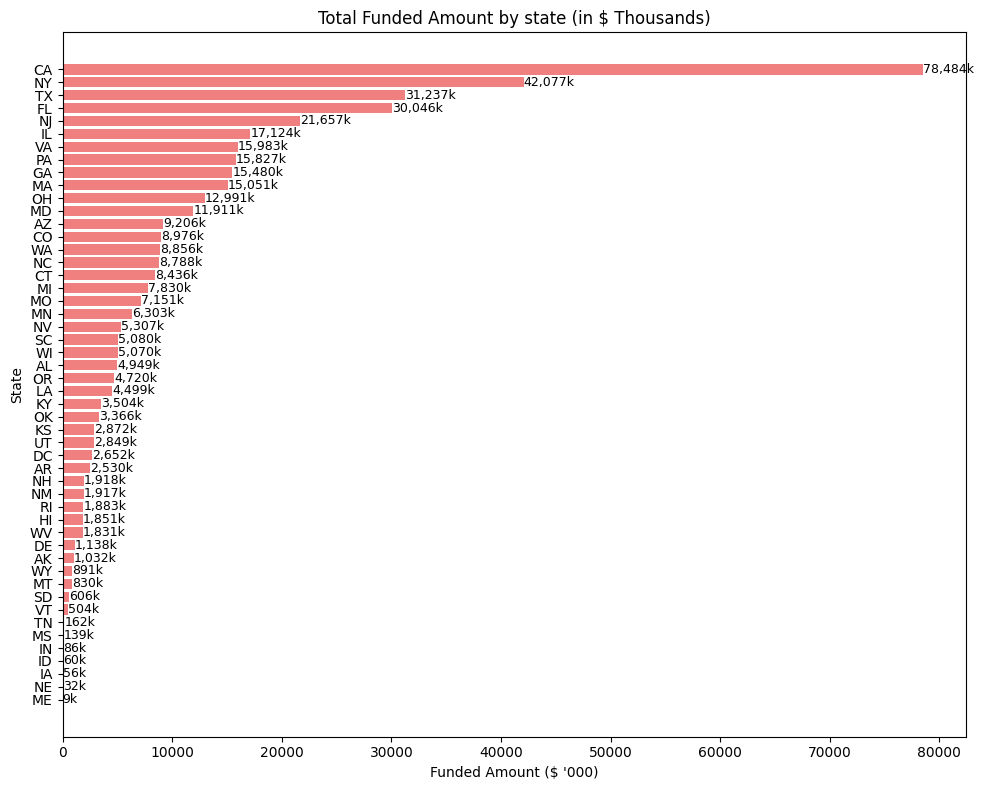

In [95]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousans = state_funding / 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousans.index,state_funding_thousans.values,color = 'lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10 , bar.get_y() + bar.get_height()/2, f'{width:,.0f}k',va='center',fontsize=9)

plt.title('Total Funded Amount by state (in $ Thousands)')
plt.xlabel('Funded Amount ($ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Loan Term Analysis by Total Funded Amount

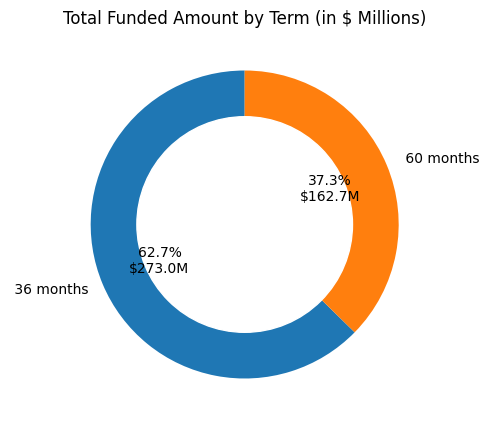

In [97]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0), .7, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

## Employee Length Analysis by Total Funded Amount

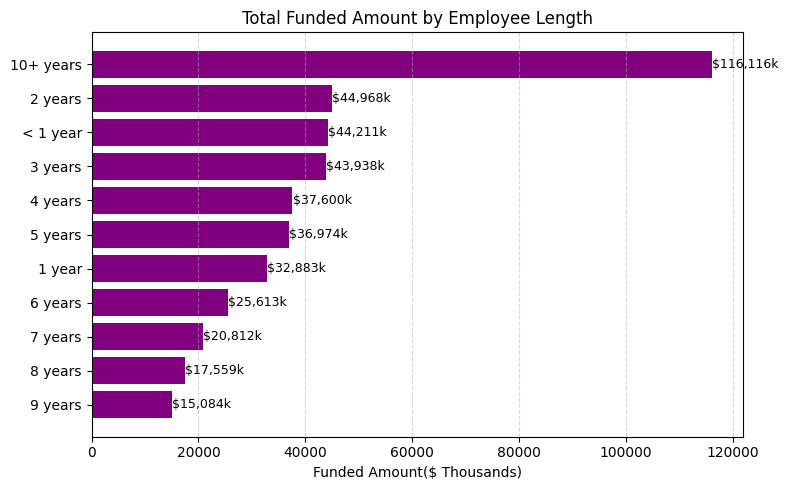

In [100]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(8,5))
bars = plt.barh(emp_funding.index,emp_funding,color = 'purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5 , bar.get_y() + bar.get_height()/2, f'${width:,.0f}k',va='center',fontsize=9)

plt.xlabel('Funded Amount($ Thousands)')
plt.title('Total Funded Amount by Employee Length')
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

## Loan Purpose by Total Funded Amount

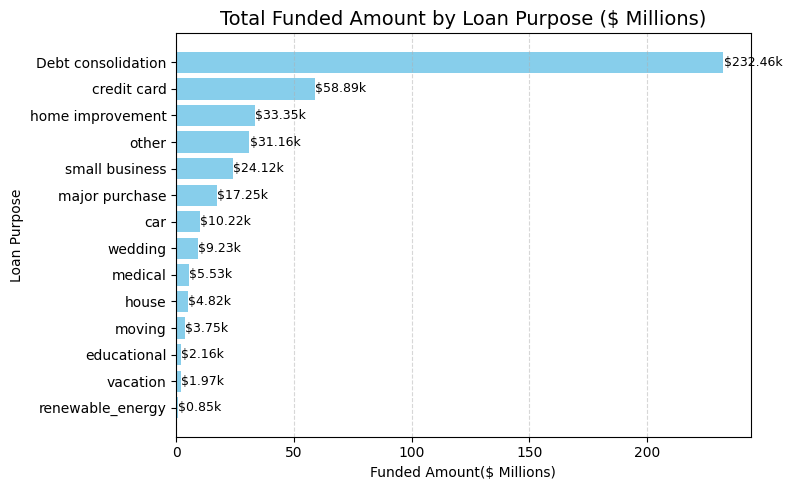

In [101]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize=(8,5))
bars = plt.barh(purpose_funding_millions.index,purpose_funding_millions,color = 'skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1 , bar.get_y() + bar.get_height()/2, f'${width:,.2f}k',va='center',fontsize=9)

plt.xlabel('Funded Amount($ Millions)')
plt.ylabel('Loan Purpose')
plt.title('Total Funded Amount by Loan Purpose ($ Millions)',fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

## Home ownership by Total Funded Amount

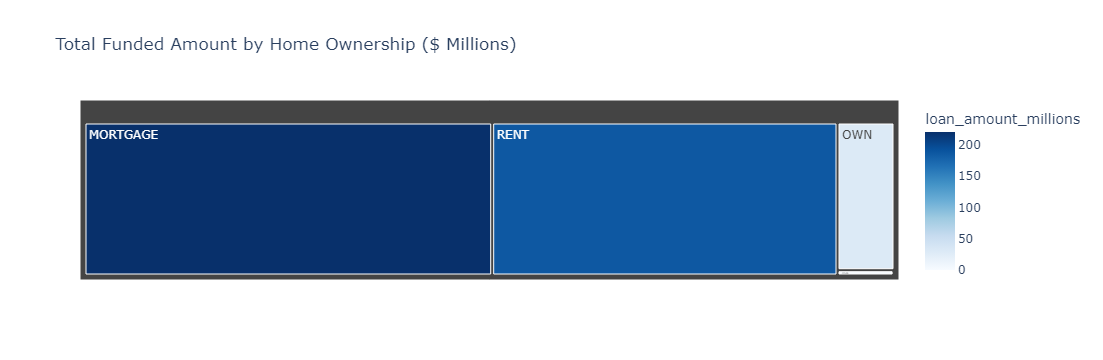

In [103]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path = ['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership ($ Millions)'
)

fig.show()